In [1]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
import optuna

from sklearn.linear_model import LinearRegression

In [2]:
with open('config.yaml','r') as file_object:
    config = yaml.load(file_object,Loader=yaml.SafeLoader)

In [20]:
study_dir = 'studies'
studies = os.listdir(study_dir)

study_names = [study.split('.')[0] for study in studies]
models = [model.split('_')[1] for model in study_names]
storages = ['sqlite:///'+'studies/'+study for study in studies]

In [24]:
studies = [optuna.load_study(study_name=study, storage=storage) for study, storage in zip(study_names, storages)]

### Best Trial

In [25]:
for model, study in enumerate(studies):
    print('Best trial of', models[model])
    trial = study.best_trial

    print(f'  MAE: {trial.value}')
    print('  Params: ')
    for key, value in trial.params.items():
        print(f'    {key}: {value}')
    print()

Best trial of xgb
  MAE: 0.04188255680889325
  Params: 
    n_rounds: 6
    eta: 0.15864404575899527
    max_depth: 3
    subsample: 0.5959421325671559
    tree_method: hist
    num_local_round: 8

Best trial of tcn
  MAE: 0.0422313782391506
  Params: 
    batch_size: 73
    local_epochs: 23
    n_rounds: 3
    n_layers: 2
    lr: 0.00015361282598070082
    filters: 23
    kernel_size: 5

Best trial of cnn
  MAE: 0.04196061413916027
  Params: 
    batch_size: 206
    local_epochs: 29
    n_rounds: 6
    n_layers: 2
    lr: 9.517052761543708e-05
    filters: 29
    kernel_size: 4



In [26]:
def ten_best(study):
    trials = [trial for trial in study.trials if trial.value is not None]
    sorted_trials = sorted(trials, key=lambda x: x.value)
    print("Top 10 Trials:", '\n')
    for trial in sorted_trials[:10]:
        print(f"Trial {trial.number}: MAE = {trial.value}")
        print(f"  Params: {trial.params}")
        print()

HPO Progess of model: xgb
Improvement per Trial: 8.213043268462585e-07


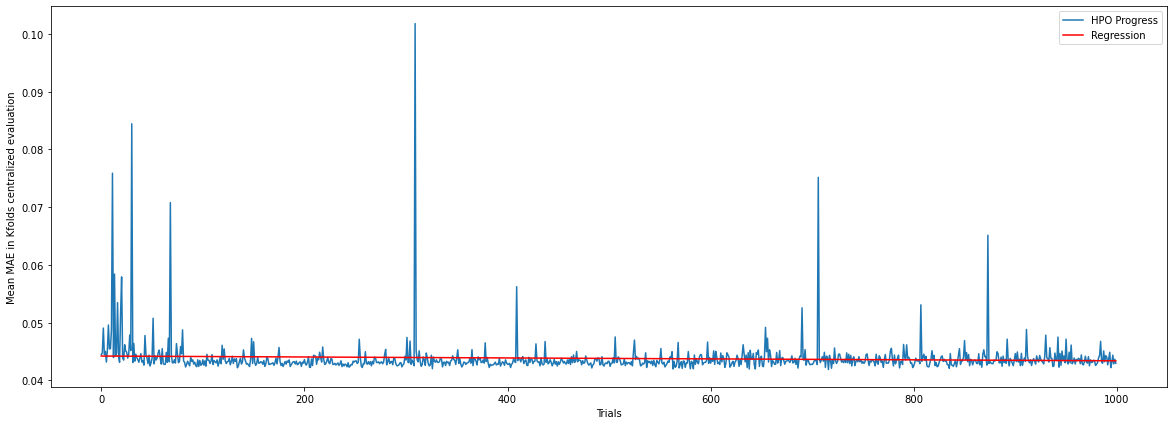

HPO Progess of model: tcn
Improvement per Trial: 6.980314244859055e-06


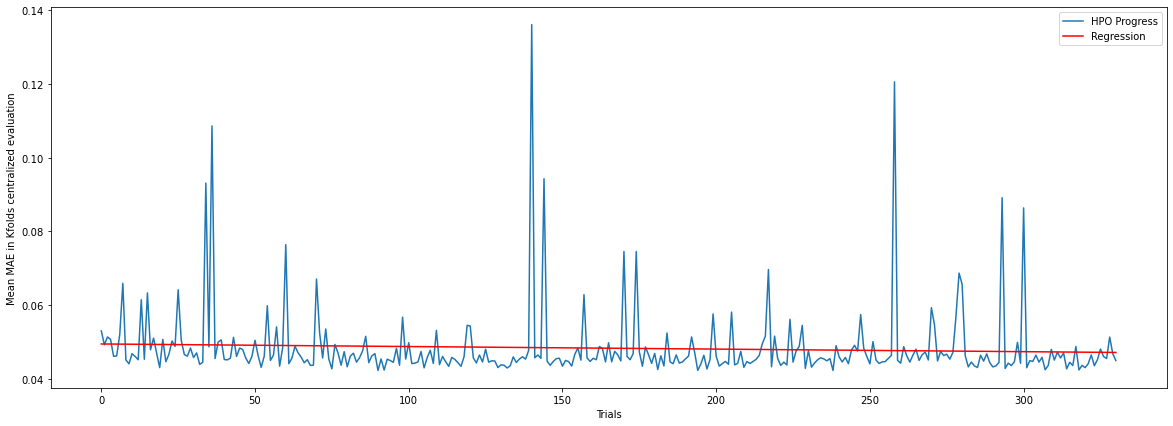

HPO Progess of model: cnn
Improvement per Trial: 2.316435288814299e-05


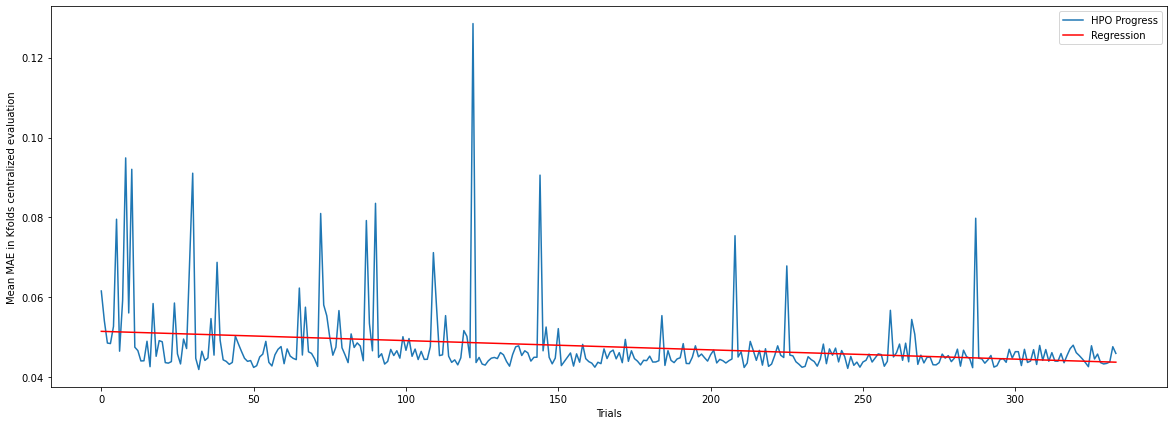

In [27]:
for model, study in enumerate(studies):
    print('HPO Progess of model:', models[model])
    trials = [trial for trial in study.trials if trial.value is not None]
    sorted_trials = sorted(trials, key=lambda x: x.value)

    sorted_by_number = sorted(trials, key=lambda x: x.number)

    progress = [trial.values for trial in sorted_by_number]

    x = np.arange(len(progress)).reshape(-1, 1)

    lr = LinearRegression()
    lr.fit(x, progress)

    y_pred = lr.predict(x)

    plt.figure(figsize=(20,7))

    print('Improvement per Trial:', lr.coef_[0][0]*-1)

    plt.plot(progress, label='HPO Progress')
    plt.plot(y_pred, 'r-', label='Regression')
    plt.xlabel('Trials')
    plt.ylabel('Mean MAE in Kfolds centralized evaluation')
    plt.legend()
    plt.show()